In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
url='https://raw.githubusercontent.com/anweshapriyadarshani/CSV/main/Google_Stock_Price_Train.csv'
training_data=pd.read_csv(url)
training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [13]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [14]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)

In [15]:
#getting the inputs and outputs
x_train = training_data[0:1257]
y_train = training_data[1:1258]

print(x_train.shape)
print(y_train.shape)

(1257, 1)
(1257, 1)


In [16]:
#reshaping
x_train = np.reshape(x_train, (1257, 1, 1))

print(x_train.shape)

(1257, 1, 1)


In [17]:
#importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.5619
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.4293
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.3273
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2503
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1517
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1225
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1020
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0882
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0790
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 13/200
40/40 [=================

In [19]:
#getting the real and importing the testing dataset
url='https://raw.githubusercontent.com/anweshapriyadarshani/CSV/main/Google_Stock_Price_Test.csv'
test_data = pd.read_csv(url)
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [20]:
# getting the predicted stock price of 2017

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[771.75885],
       [779.4945 ],
       [777.6601 ],
       [784.99854],
       [793.73254],
       [794.8632 ],
       [792.6452 ],
       [794.306  ],
       [794.5693 ],
       [794.2596 ],
       [793.27466],
       [792.73865],
       [794.1278 ],
       [794.3912 ],
       [805.8702 ],
       [811.32745],
       [817.3353 ],
       [815.07355],
       [800.08636],
       [786.2645 ]], dtype=float32)

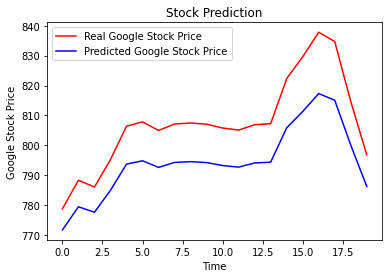

In [21]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [22]:
# getting the real stock price of 2012 - 2016
url='https://raw.githubusercontent.com/anweshapriyadarshani/CSV/main/Google_Stock_Price_Train.csv'
training_data = pd.read_csv(url)
training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [23]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [24]:
# getting the predicted stock price of 2012-2016

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

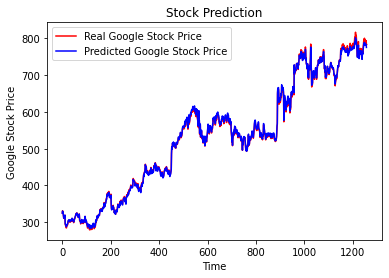

In [25]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating the RNN model

import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(rmse)